In [185]:
import numpy as np
import pandas as pd

## Load in data and select variables

In [186]:
# Public Pension Fund Data from Public Plans Data
p_data = pd.read_excel('PPD_PlanLevel.xlsx')

In [187]:
p_data = p_data.rename(columns = {'fy':'year', 'StateAbbrev': 'st'})

In [188]:
p_data.dropna(axis=1, how='all', inplace=True)

In [189]:
clean_p_data =  p_data[['year', 'st', 'EmployeeTypeCovered',
                        'SocSecCovered', 'CostStructure', 'EmployerType', 'InflationAssumption_GASB',
                        'InvestmentReturnAssumption_GASB', 'ActCostMethCode_GASB', 'ActFundedRatio_GASB', 
                       'TotMembership', 'InvestmentReturn_1yr', 'equities_tot']]

In [190]:
clean_p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 13 columns):
year                               2702 non-null int64
st                                 2692 non-null object
EmployeeTypeCovered                2692 non-null object
SocSecCovered                      2692 non-null float64
CostStructure                      2692 non-null object
EmployerType                       2692 non-null float64
InflationAssumption_GASB           2439 non-null float64
InvestmentReturnAssumption_GASB    2600 non-null float64
ActCostMethCode_GASB               2590 non-null float64
ActFundedRatio_GASB                2669 non-null float64
TotMembership                      2631 non-null float64
InvestmentReturn_1yr               2646 non-null float64
equities_tot                       2548 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 274.5+ KB


In [191]:
# Economic data from Correlates of State Policy Project
econ_data = pd.read_excel('economicfiscal.xlsx')

In [192]:
clean_econ_data = econ_data[['year', 'st', 'budget_surplus_gsp', 'taxes_gsp']]

In [193]:
# Politics data from Shor-McCarthy State Legislative Aggregate Ideology Data
pol_data = pd.read_stata("shor mccarty 1993-2016 state aggregate data May 2018 release.dta")

In [194]:
pol_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 31 columns):
st                    1200 non-null object
alpha                 1200 non-null int8
fips                  1200 non-null int8
icpsr                 1200 non-null int8
year                  1200 non-null int16
hou_chamber           1007 non-null float64
sen_chamber           1018 non-null float64
hou_dem               1007 non-null float64
hou_rep               1007 non-null float64
hou_majority          1007 non-null float64
sen_dem               1018 non-null float64
sen_rep               1018 non-null float64
sen_majority          1018 non-null float64
h_diffs               1007 non-null float64
s_diffs               1018 non-null float64
h_distance            1007 non-null float64
s_distance            1018 non-null float64
h_dem_sd              1007 non-null float64
s_dem_sd              1018 non-null float64
h_rep_sd              1007 non-null float64
s_rep_sd              101

In [195]:
pol_data.columns

Index(['st', 'alpha', 'fips', 'icpsr', 'year', 'hou_chamber', 'sen_chamber',
       'hou_dem', 'hou_rep', 'hou_majority', 'sen_dem', 'sen_rep',
       'sen_majority', 'h_diffs', 's_diffs', 'h_distance', 's_distance',
       'h_dem_sd', 's_dem_sd', 'h_rep_sd', 's_rep_sd', 'h_chamber_sd',
       's_chamber_sd', 'hou_dem_error', 'hou_chamber_error', 'hou_rep_error',
       'hou_majority_error', 'sen_dem_error', 'sen_chamber_error',
       'sen_rep_error', 'sen_majority_error'],
      dtype='object')

In [196]:
clean_pol_data = pol_data[['st', 'year',
       'hou_dem', 'hou_rep', 'sen_dem', 'sen_rep',
       'h_diffs', 's_diffs', 'h_distance', 's_distance',
       'h_dem_sd', 's_dem_sd', 'h_rep_sd', 's_rep_sd']]

In [197]:
# Merge the three dfs on year and state. 
df = clean_p_data.merge(clean_pol_data, on = ['year', 'st'])
df.head()

,year,st,EmployeeTypeCovered,SocSecCovered,CostStructure,EmployerType,InflationAssumption_GASB,InvestmentReturnAssumption_GASB,ActCostMethCode_GASB,ActFundedRatio_GASB,...,sen_dem,sen_rep,h_diffs,s_diffs,h_distance,s_distance,h_dem_sd,s_dem_sd,h_rep_sd,s_rep_sd
0,2001,AL,Plan covers state and local employees,1.0,"Multiple employer, agent plan",2.0,0.045,0.08,1.0,1.0020,...,-0.119,1.073,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371
1,2001,AL,Plan covers teachers,1.0,"Multiple employer, cost sharing plan",2.0,0.030,0.08,1.0,1.0140,...,-0.119,1.073,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371
2,2001,AL,Plan covers local employees,1.0,Single employer,1.0,NaN,NaN,NaN,1.0634,...,-0.119,1.073,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371
3,2002,AL,Plan covers state and local employees,1.0,"Multiple employer, agent plan",2.0,0.045,0.08,1.0,0.9540,...,-0.119,1.073,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371
4,2002,AL,Plan covers teachers,1.0,"Multiple employer, cost sharing plan",2.0,0.045,0.08,1.0,0.9740,...,-0.119,1.073,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371


In [198]:
df = df.merge(clean_econ_data, on = ['year', 'st'])

In [199]:
df.head()

,year,st,EmployeeTypeCovered,SocSecCovered,CostStructure,EmployerType,InflationAssumption_GASB,InvestmentReturnAssumption_GASB,ActCostMethCode_GASB,ActFundedRatio_GASB,...,h_diffs,s_diffs,h_distance,s_distance,h_dem_sd,s_dem_sd,h_rep_sd,s_rep_sd,budget_surplus_gsp,taxes_gsp
0,2001,AL,Plan covers state and local employees,1.0,"Multiple employer, agent plan",2.0,0.045,0.08,1.0,1.0020,...,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371,0.562585,5.617846
1,2001,AL,Plan covers teachers,1.0,"Multiple employer, cost sharing plan",2.0,0.030,0.08,1.0,1.0140,...,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371,0.562585,5.617846
2,2001,AL,Plan covers local employees,1.0,Single employer,1.0,NaN,NaN,NaN,1.0634,...,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371,0.562585,5.617846
3,2002,AL,Plan covers state and local employees,1.0,"Multiple employer, agent plan",2.0,0.045,0.08,1.0,0.9540,...,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371,-0.139255,5.202069
4,2002,AL,Plan covers teachers,1.0,"Multiple employer, cost sharing plan",2.0,0.045,0.08,1.0,0.9740,...,1.015,1.192,0.662873,0.931986,0.330477,0.577783,0.248941,0.384371,-0.139255,5.202069


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2660 entries, 0 to 2659
Data columns (total 27 columns):
year                               2660 non-null int64
st                                 2660 non-null object
EmployeeTypeCovered                2660 non-null object
SocSecCovered                      2660 non-null float64
CostStructure                      2660 non-null object
EmployerType                       2660 non-null float64
InflationAssumption_GASB           2407 non-null float64
InvestmentReturnAssumption_GASB    2568 non-null float64
ActCostMethCode_GASB               2558 non-null float64
ActFundedRatio_GASB                2647 non-null float64
TotMembership                      2599 non-null float64
InvestmentReturn_1yr               2606 non-null float64
equities_tot                       2516 non-null float64
hou_dem                            2484 non-null float64
hou_rep                            2484 non-null float64
sen_dem                            2483 non

In [201]:
df.dropna(inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 2653
Data columns (total 27 columns):
year                               1233 non-null int64
st                                 1233 non-null object
EmployeeTypeCovered                1233 non-null object
SocSecCovered                      1233 non-null float64
CostStructure                      1233 non-null object
EmployerType                       1233 non-null float64
InflationAssumption_GASB           1233 non-null float64
InvestmentReturnAssumption_GASB    1233 non-null float64
ActCostMethCode_GASB               1233 non-null float64
ActFundedRatio_GASB                1233 non-null float64
TotMembership                      1233 non-null float64
InvestmentReturn_1yr               1233 non-null float64
equities_tot                       1233 non-null float64
hou_dem                            1233 non-null float64
hou_rep                            1233 non-null float64
sen_dem                            1233 non

In [203]:
# Change non-num variables to numerical
inter = pd.factorize(df['st'])

In [204]:
df['st'] = inter[0]

In [205]:
inter2  = pd.factorize(df['EmployeeTypeCovered'])

In [206]:
df['EmployeeTypeCovered'] = inter2[0]

In [207]:
inter3  = pd.factorize(df['CostStructure'])

In [208]:
df['CostStructure'] = inter3[0]

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 2653
Data columns (total 27 columns):
year                               1233 non-null int64
st                                 1233 non-null int64
EmployeeTypeCovered                1233 non-null int64
SocSecCovered                      1233 non-null float64
CostStructure                      1233 non-null int64
EmployerType                       1233 non-null float64
InflationAssumption_GASB           1233 non-null float64
InvestmentReturnAssumption_GASB    1233 non-null float64
ActCostMethCode_GASB               1233 non-null float64
ActFundedRatio_GASB                1233 non-null float64
TotMembership                      1233 non-null float64
InvestmentReturn_1yr               1233 non-null float64
equities_tot                       1233 non-null float64
hou_dem                            1233 non-null float64
hou_rep                            1233 non-null float64
sen_dem                            1233 non-nu

In [210]:
# Use to check distribution of variables in cleaned dataset
df.TotMembership.describe()

count    1.233000e+03
mean     1.458699e+05
std      2.153742e+05
min      2.627000e+03
25%      2.066300e+04
50%      6.833900e+04
75%      1.733430e+05
max      1.621906e+06
Name: TotMembership, dtype: float64

## Do PCA to determine the best variables to use.

In [211]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib

In [212]:
pca = PCA().fit(scale(df))

cols = [f'C{i}' for i in range(1, len(df.columns)+1)]
pca_loadings = pd.DataFrame(pca.components_.T, df.columns, cols)

pca_loadings

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27
year,-0.031932,-0.007537,-0.115165,0.151984,-0.455899,0.327339,0.064200,0.286499,-0.192840,-0.083034,...,-0.141889,0.010012,0.294486,-0.103818,0.047431,0.000232,0.018960,0.005572,1.012062e-16,0.000000e+00
st,0.173833,0.147436,0.229274,-0.342203,-0.143119,0.092965,-0.105947,-0.013658,-0.257843,0.060895,...,0.121211,-0.063419,-0.047485,-0.414202,0.045224,-0.075312,0.015304,-0.000303,2.455797e-16,8.149980e-17
EmployeeTypeCovered,-0.101457,0.051454,-0.358465,-0.337486,-0.059248,0.092642,-0.204819,-0.055236,0.201542,0.000260,...,0.444997,-0.138777,0.150950,-0.064209,0.036652,-0.000225,0.035528,-0.020098,-3.890305e-17,-8.118831e-17
SocSecCovered,-0.027676,0.099745,0.209602,-0.350512,-0.064919,0.027946,0.441693,-0.043045,0.153113,-0.351326,...,0.084804,-0.073659,0.077364,-0.028969,0.009315,0.044454,0.013499,-0.001731,-2.920598e-17,-4.391825e-17
CostStructure,-0.011273,0.093942,-0.404024,-0.218944,-0.120601,-0.076599,0.130715,0.066179,-0.118652,-0.090119,...,0.164610,0.297464,0.248218,-0.072569,0.080529,-0.031285,0.007674,-0.006277,1.063307e-16,-1.204588e-16
EmployerType,0.059252,-0.043871,0.502762,0.156682,0.056132,0.117020,-0.232939,0.152852,-0.148209,-0.139149,...,0.380992,0.428640,0.224528,-0.185154,0.030681,-0.025662,0.010369,0.001125,1.156289e-16,-1.448335e-16
InflationAssumption_GASB,-0.120299,-0.230930,-0.011327,-0.119806,0.444778,-0.095225,-0.012761,0.012878,0.022968,-0.100333,...,0.197588,-0.210909,0.117078,-0.284176,0.010360,-0.033057,0.024635,-0.003551,1.282922e-16,-2.460635e-16
InvestmentReturnAssumption_GASB,-0.017753,0.083061,-0.233909,0.081903,0.372875,-0.084587,-0.184118,0.233277,-0.366535,0.246766,...,-0.085602,0.050397,0.138129,-0.037782,-0.025290,0.017966,-0.009047,0.003454,-7.640185e-17,-4.565463e-17
ActCostMethCode_GASB,0.008602,0.467776,0.103466,-0.097005,-0.073951,-0.182410,-0.066069,0.045110,-0.391648,0.081376,...,0.203359,-0.500081,-0.044564,0.178567,-0.132001,0.018762,0.018985,-0.001734,2.548600e-16,-6.179292e-17
ActFundedRatio_GASB,-0.088772,0.173544,0.325734,-0.310942,0.142158,-0.241007,-0.060815,-0.269062,-0.029465,0.158576,...,-0.450505,0.154413,0.280655,-0.086378,0.070270,-0.000855,0.001267,-0.001832,-7.994482e-17,1.529515e-18


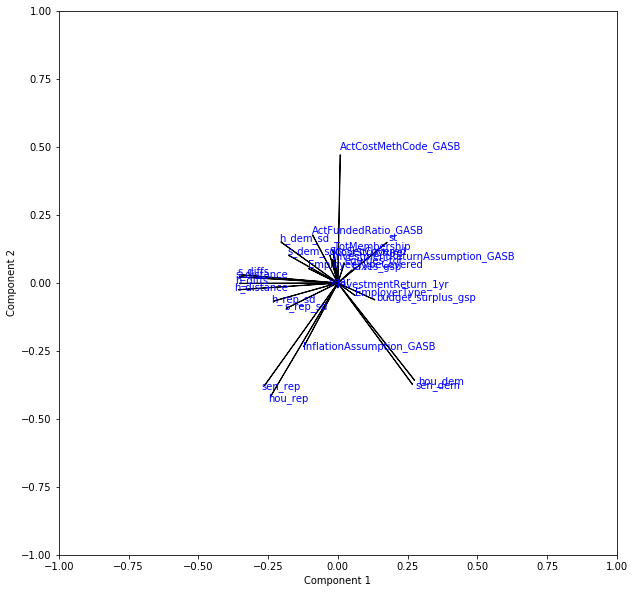

In [213]:
%matplotlib inline

fig , plot = plt.subplots(figsize=(10,10))
    
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plot.set_xlim(-1, 1)
plot.set_ylim(-1, 1)

# Plot each vector and label them.
for i in range(len(df.columns)):
    plot.arrow(0,0, pca_loadings['C1'][i], pca_loadings['C2'][i])
    plot.text(pca_loadings['C1'][i]*1.05, pca_loadings['C2'][i]*1.05, pca_loadings['C1'].index[i], color='blue')

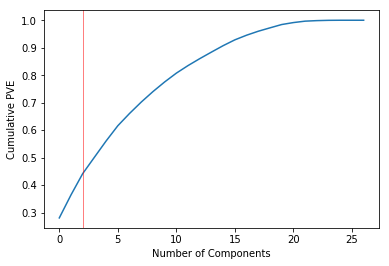

In [214]:
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show
    
ax = figure().gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative PVE')
plt.axvline(x=2, linewidth=1, color='r', alpha=0.5)
show()

## Decision Trees and Random Forest Model

In [215]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

In [216]:
df.columns

Index(['year', 'st', 'EmployeeTypeCovered', 'SocSecCovered', 'CostStructure',
       'EmployerType', 'InflationAssumption_GASB',
       'InvestmentReturnAssumption_GASB', 'ActCostMethCode_GASB',
       'ActFundedRatio_GASB', 'TotMembership', 'InvestmentReturn_1yr',
       'equities_tot', 'hou_dem', 'hou_rep', 'sen_dem', 'sen_rep', 'h_diffs',
       's_diffs', 'h_distance', 's_distance', 'h_dem_sd', 's_dem_sd',
       'h_rep_sd', 's_rep_sd', 'budget_surplus_gsp', 'taxes_gsp'],
      dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 2653
Data columns (total 27 columns):
year                               1233 non-null int64
st                                 1233 non-null int64
EmployeeTypeCovered                1233 non-null int64
SocSecCovered                      1233 non-null float64
CostStructure                      1233 non-null int64
EmployerType                       1233 non-null float64
InflationAssumption_GASB           1233 non-null float64
InvestmentReturnAssumption_GASB    1233 non-null float64
ActCostMethCode_GASB               1233 non-null float64
ActFundedRatio_GASB                1233 non-null float64
TotMembership                      1233 non-null float64
InvestmentReturn_1yr               1233 non-null float64
equities_tot                       1233 non-null float64
hou_dem                            1233 non-null float64
hou_rep                            1233 non-null float64
sen_dem                            1233 non-nu

In [252]:
X = df[['year', 'EmployeeTypeCovered', 'SocSecCovered', 'CostStructure',
       'EmployerType', 'ActCostMethCode_GASB','InvestmentReturnAssumption_GASB',
       'ActFundedRatio_GASB', 'TotMembership', 'InvestmentReturn_1yr', 'h_diffs',
       's_diffs', 'h_distance', 's_distance', 'h_dem_sd', 's_dem_sd',
       'h_rep_sd', 's_rep_sd', 'budget_surplus_gsp', 'taxes_gsp']]
y = df[['equities_tot']]

In [253]:
pension_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
pension_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4,
                                                    random_state=25)
pension_tree2 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
pension_tree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [268]:
from sklearn.metrics import mean_squared_error

y_pred = pension_tree2.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)
print('Error=', (MSE1 ** .5))

MSE= 0.00839094374847
Error= 0.0916020946729


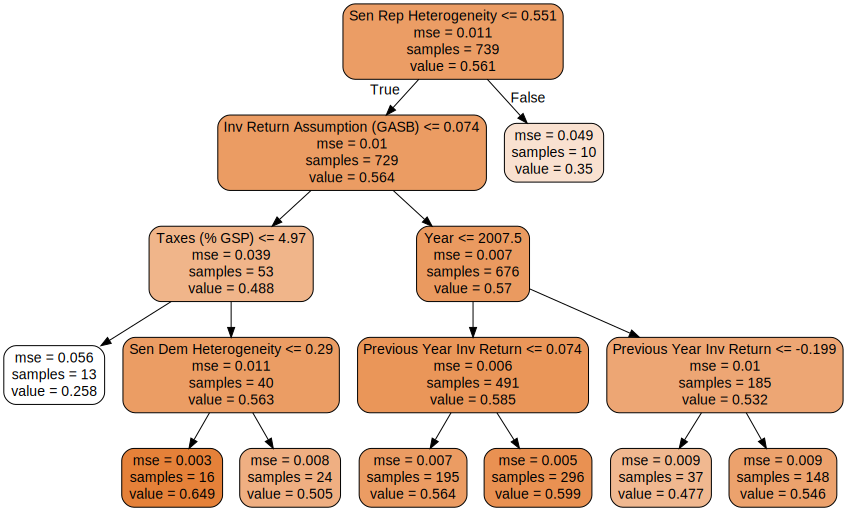

In [269]:
from sklearn.tree import export_graphviz
import graphviz

pension_tree_viz2 = export_graphviz(
    pension_tree2,
    out_file=None,
    feature_names=['Year', 'EmployeeTypeCovered', 'SocSecCovered', 'CostStructure',
       'EmployerType', 'ActCostMethCode_GASB','Inv Return Assumption (GASB)',
       'ActFundedRatio_GASB', 'TotMembership', 'Previous Year Inv Return', 'h_diffs',
       's_diffs', 'h_distance', 's_distance', 'House Dem Heterogeneity', 'Sen Dem Heterogeneity',
       'House Rep Heterogeneity', 'Sen Rep Heterogeneity', 'budget_surplus_gsp', 'Taxes (% GSP)'],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(pension_tree_viz2)
graph.render('pension_tree_viz2')
graph

In [264]:
# Deeper tree for feature importances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4,
                                                    random_state=25)
pension_tree3 = DecisionTreeRegressor(max_depth=100, min_samples_leaf=10)
pension_tree3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [265]:
from sklearn.metrics import mean_squared_error

y_pred = pension_tree3.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)
print('Error=', (MSE1 ** .5))

MSE= 0.00749178327881
Error= 0.0865550881163


In [266]:
pension_tree3.feature_importances_

array([ 0.08178519,  0.00106991,  0.        ,  0.        ,  0.        ,
        0.00854471,  0.08486975,  0.06099362,  0.04087192,  0.09284775,
        0.        ,  0.01593275,  0.01618638,  0.02568366,  0.10695195,
        0.01656032,  0.0662858 ,  0.13541987,  0.01073771,  0.23525872])

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means to

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

Min. MSE= 0.00702967010763 , Min. B= 36


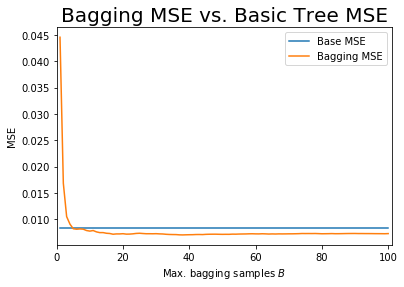

In [223]:
# Bagging regressor
from sklearn.ensemble import BaggingRegressor

MSE_base = MSE1
max_samples = 100
MSE_vec = np.zeros(max_samples)
for ind in range(1, max_samples + 1):
    hit_tree_loop = BaggingRegressor(DecisionTreeRegressor(), n_estimators=ind,
                                 max_samples=100, bootstrap=True, oob_score=True,
                                 random_state=15)
    hit_tree_loop.fit(X, y)
    y_pred_loop = hit_tree_loop.oob_prediction_
    MSE_vec[ind - 1] = mean_squared_error(y, y_pred_loop)
    # print('MSE=', MSE_vec[ind - 1])

fig, ax = plt.subplots()
plt.plot(np.arange(1, max_samples + 1), MSE_base * np.ones(max_samples),
         label='Base MSE')
plt.plot(np.arange(1, max_samples + 1), MSE_vec, label='Bagging MSE')
# for the minor ticks, use no labels; default NullFormatter
plt.title('Bagging MSE vs. Basic Tree MSE', fontsize=20)
plt.xlabel(r'Max. bagging samples $B$')
plt.ylabel(r'MSE')
plt.xlim((0, max_samples + 1))
plt.legend(loc='best')

print('Min. MSE=', MSE_vec.min(), ', Min. B=', np.argwhere(MSE_vec == MSE_vec.min())[0, 0] - 1)

In [224]:
from sklearn.ensemble import RandomForestRegressor

hit_tree4 = RandomForestRegressor(n_estimators=53, max_features='sqrt', bootstrap=True,
                                  oob_score=True, random_state=15)
hit_tree4.fit(X, y)

hit_tree4.score(X, y)
y_pred4 = hit_tree4.oob_prediction_
MSE4 = mean_squared_error(y, y_pred4)
print('MSE=', MSE4)

MSE= 0.00360872305344


/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comput

Min. bag MSE= 0.00702967010763 , Min. bag B= 36
Min. rnd MSE= 0.00348459225352 , Min. rnd B= 98


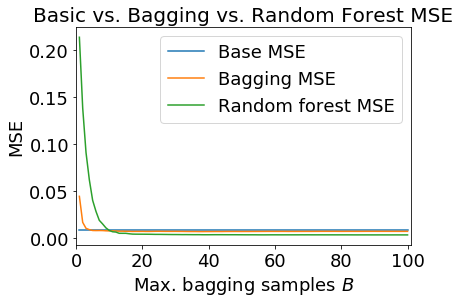

In [307]:
max_samples = 100
MSE_vec4 = np.zeros(max_samples)
for ind in range(1, max_samples + 1):
    hit_tree4_loop = RandomForestRegressor(n_estimators=ind, max_features='sqrt',
                                           bootstrap=True, oob_score=True,
                                           random_state=15)
    hit_tree4_loop.fit(X, y)
    y_pred4_loop = hit_tree4_loop.oob_prediction_
    MSE_vec4[ind - 1] = mean_squared_error(y, y_pred4_loop)
    # print('MSE=', MSE_vec[ind - 1])

fig, ax = plt.subplots()
plt.plot(np.arange(1, max_samples + 1), MSE_base * np.ones(max_samples),
         label='Base MSE')
plt.plot(np.arange(1, max_samples + 1), MSE_vec, label='Bagging MSE')
plt.plot(np.arange(1, max_samples + 1), MSE_vec4, label='Random forest MSE')
# for the minor ticks, use no labels; default NullFormatter
plt.title('Basic vs. Bagging vs. Random Forest MSE', fontsize=20)
plt.xlabel(r'Max. bagging samples $B$')
plt.ylabel(r'MSE')
plt.xlim((0, max_samples + 1))
plt.legend(loc='best')

print('Min. bag MSE=', MSE_vec.min(), ', Min. bag B=', np.argwhere(MSE_vec == MSE_vec.min())[0, 0] - 1)
print('Min. rnd MSE=', MSE_vec4.min(), ', Min. rnd B=', np.argwhere(MSE_vec4 == MSE_vec4.min())[0, 0] - 1)

## Neural Networks

In [271]:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor

In [272]:
# UNSCALED
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=100)

In [273]:
X = df[['year', 'EmployeeTypeCovered', 'SocSecCovered', 'CostStructure',
       'EmployerType', 'ActCostMethCode_GASB','InvestmentReturnAssumption_GASB',
       'ActFundedRatio_GASB', 'TotMembership', 'InvestmentReturn_1yr', 'h_diffs',
       's_diffs', 'h_distance', 's_distance', 'h_dem_sd', 's_dem_sd',
       'h_rep_sd', 's_rep_sd', 'budget_surplus_gsp', 'taxes_gsp']].values
y = df[['equities_tot']].values.ravel()

In [274]:
kf.get_n_splits(X)

4

In [299]:
mse_list = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nnet = MLPRegressor(activation = 'tanh', solver = 'lbfgs', random_state = 100)
    nnet.fit(X_train, y_train)
    y_pred = nnet.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mse_list.append(mse)
                
mse_list 

[0.0047287125541371888,
 0.0038777940164166488,
 0.0035221675792652695,
 0.0036642168785996189]

In [300]:
mse = np.mean(mse_list)
print(mse)
print('Error=', (mse ** .5))

0.0039482227571
Error= 0.0628348848738


In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
# SCALE THE DATA
X = StandardScaler().fit_transform(X)

In [303]:
kf.get_n_splits(X)

4

In [304]:
mse_list = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nnet = MLPRegressor(activation = 'tanh', solver = 'lbfgs', random_state = 100)
    nnet.fit(X_train, y_train)
    y_pred = nnet.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mse_list.append(mse)
                
mse_list 

[0.004760659264875019,
 0.0040772406486048948,
 0.0035070197964245462,
 0.0035999046505013773]

In [305]:
mse = np.mean(mse_list)
print(mse)
print('Error=', (mse ** .5))

0.0039862060901
Error= 0.0631364085936


## Plotting Distributions

In [237]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]


In [241]:
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})

Text(0.5,0,'Equities Total')

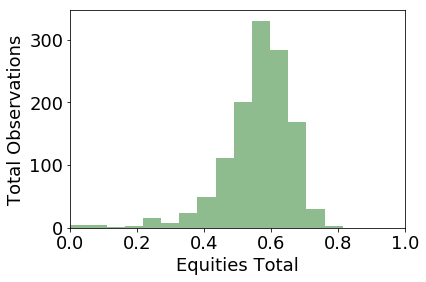

In [242]:
y = df[['equities_tot']].values
plt.hist(y, bins=15, color="darkseagreen")
plt.xlim((0,1))
# plt.title("Distribution of Total Equity Allocation")
plt.ylabel(r'Total Observations')
plt.xlabel(r'Equities Total')

Text(0.5,0,'Prev Year Inv Return')

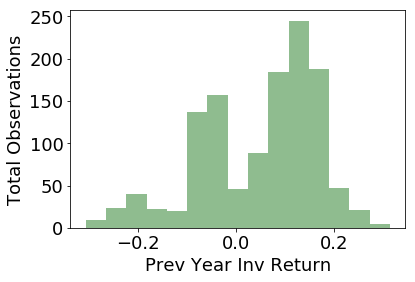

In [243]:
y = df[['InvestmentReturn_1yr']].values
plt.hist(y, bins=15, color="darkseagreen")
# plt.xlim((0,0.4))
# plt.title("Distribution of Prev Year Inv Return")
plt.ylabel(r'Total Observations')
plt.xlabel(r'Prev Year Inv Return')

Text(0.5,0,'Funded Ratio')

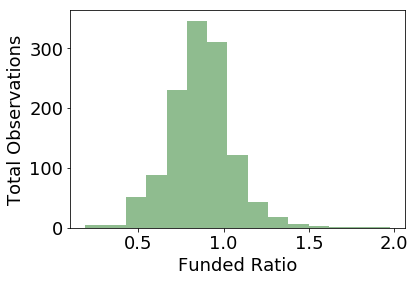

In [244]:
y = df[['ActFundedRatio_GASB']].values
plt.hist(y, bins=15, color="darkseagreen")
# plt.xlim((0,0.4))
# plt.title("Distribution of Funded Ratio")
plt.ylabel(r'Total Observations')
plt.xlabel(r'Funded Ratio')

Text(0.5,0,'Senate Dem Heterogeneity')

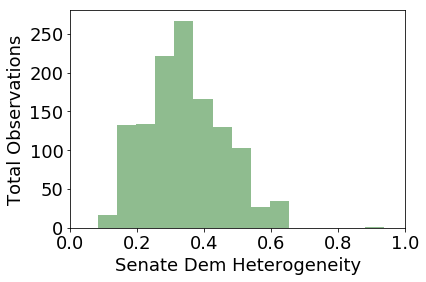

In [245]:
y = df[['s_dem_sd']].values
plt.hist(y, bins=15, color="darkseagreen")
plt.xlim((0,1))
# plt.title("Distribution of Funded Ratio")
plt.ylabel(r'Total Observations')
plt.xlabel(r'Senate Dem Heterogeneity')